In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd
import seaborn as sb
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import os, cv2
from google.colab.patches import cv2_imshow
import pathlib
from keras.preprocessing import image

# Load the training generator for getting class indices
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir="/content/gdrive/MyDrive/Project_Dataset"

batch_size=16

# Load the model
classifierLoad = tf.keras.models.load_model('/content/drive/MyDrive/Project_Dataset/Crop_Disease_Classification_Model1.h5')

# Load the training generator for getting class indices
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(200, 200),
    batch_size=batch_size,
    classes=['CORN-GREY LEAF SPOT', 'POTATO-EARLY BLIGHT', 'POTATO-LATE BLIGHT', 'RICE-BACTERIAL BLIGHT', 'RICE-BROWN SPOT', 'TOMATO-EARLY BLIGHT', 'WHEAT-BROWN RUST', 'WHEAT-YELLOW RUST'],
    class_mode='categorical'
)

# Get the mapping of class names to indices
class_indices = train_generator.class_indices



Found 0 images belonging to 8 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


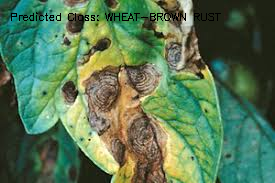

In [ ]:
# Load and preprocess the test image
test_image_path = "/content/OLL-5.jpeg"
test_image = image.load_img(test_image_path, target_size=(200, 200))
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

# Get the model prediction
result = classifierLoad.predict(test_image_array)

# Get the predicted class index
predicted_class_index = np.argmax(result)

# Map the predicted class index to class name using class_indices
predicted_class_name = [k for k, v in class_indices.items() if v == predicted_class_index][0]

# Load the image for displaying
img = cv2.imread(test_image_path)

# Show the predicted class on the image
cv2.putText(img, f"Predicted Class: {predicted_class_name}", (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 0), 0)

# Display the image with predicted class
cv2_imshow(img)

In [ ]:
import cv2

In [ ]:
from google.colab.patches import cv2_imshow

ModuleNotFoundError: No module named 'tensorflow.python.keras.preprocessing'